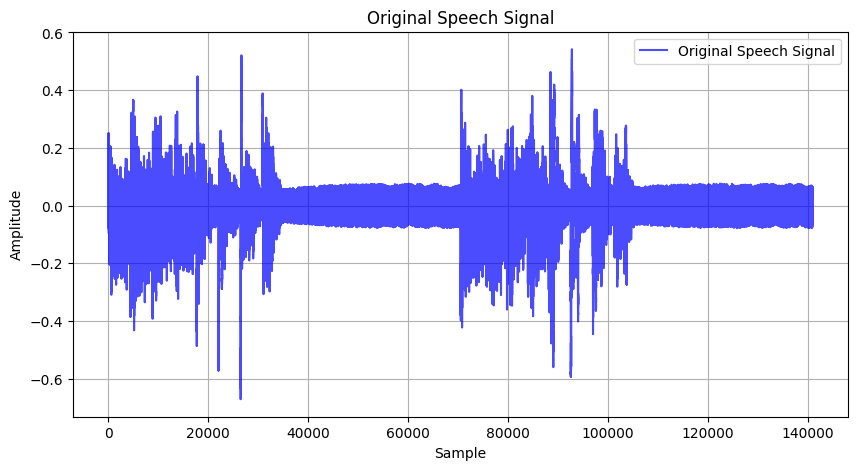

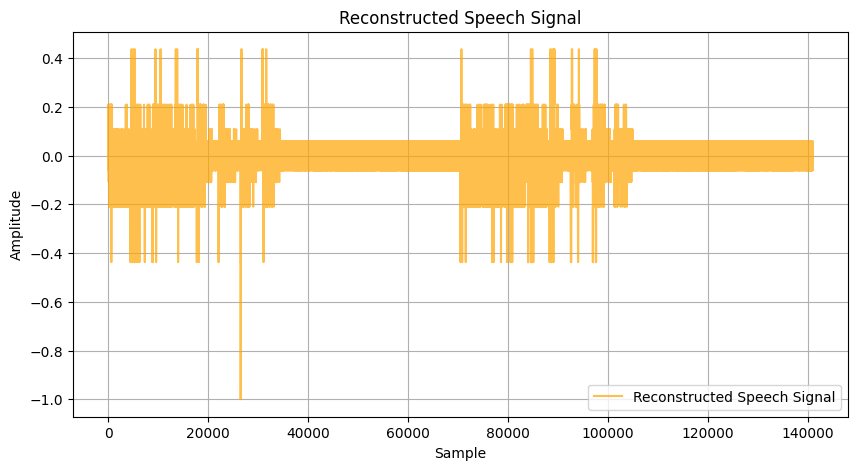

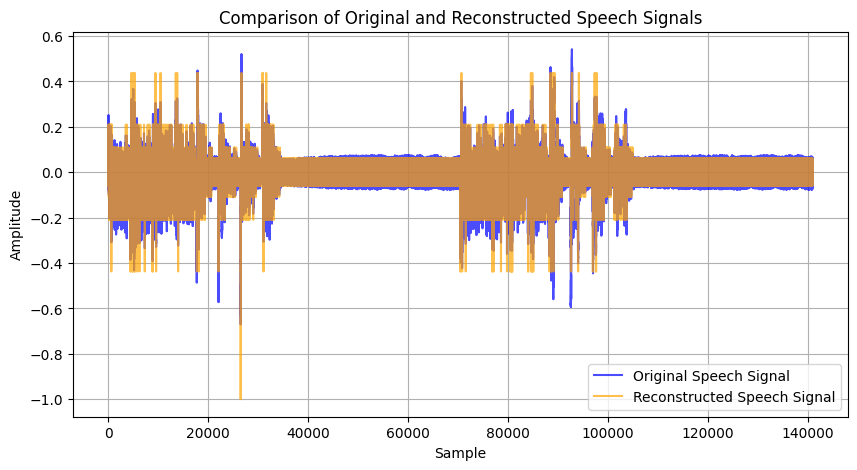

NameError: name 'quantized_signal' is not defined

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt





In [ ]:
# A-law non-linear transformation function
def a_law_transform(signal, A=87.6):
    A = A  # A-law compression parameter
    transformed_signal = np.sign(signal) * (np.log1p(A * np.abs(signal)) / np.log1p(A))
    return transformed_signal

# Inverse A-law non-linear transformation function
def inverse_a_law_transform(signal, A=87.6):
    A = A  # A-law compression parameter
    inverse_transformed_signal = np.sign(signal) * ((1 / A) * (np.expm1(np.log1p(A) * np.abs(signal))))
    return inverse_transformed_signal

# Function for nonuniform quantization
def nonuniform_quantization(signal, levels):
    # Apply non-linear transformation to the quantization levels
    nonuniform_levels = np.linspace(-1, 1, levels)**3  # Example non-linear transformation (cubing)

    # Quantize the signal using the nonuniform levels
    quantized_signal = np.zeros_like(signal)
    for i, sample in enumerate(signal):
        quantized_signal[i] = nonuniform_levels[np.argmin(np.abs(sample - nonuniform_levels))]
    
    return quantized_signal

# Function to calculate Signal to Quantization Noise Ratio (SQNR)
def calculate_sqnr(original_signal, quantized_signal):
    signal_power = np.mean(np.square(original_signal))
    noise_power = np.mean(np.square(original_signal - quantized_signal))
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr

# Load speech signal from a WAV file using librosa
speech_signal, sampling_freq = librosa.load('speech.wav')  # Replace 'speech.wav' with the filename of your speech signal

# Apply A-law transformation to the speech signal
transformed_signal = a_law_transform(speech_signal)

# Apply nonuniform quantization to the transformed signal
quantization_levels = 32  # Number of quantization levels
quantized_signal_nonuniform = nonuniform_quantization(transformed_signal, quantization_levels)

# Reconstruct the signal by applying the inverse A-law transformation
reconstructed_signal = inverse_a_law_transform(quantized_signal_nonuniform)

# Plot original speech signal in blue color
plt.figure(figsize=(10, 5))
plt.plot(speech_signal, color='blue', label='Original Speech Signal', alpha=0.7)
plt.title('Original Speech Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(reconstructed_signal, color='orange', label='Reconstructed Speech Signal', alpha=0.7)
plt.title('Reconstructed Speech Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot original and reconstructed signals
plt.figure(figsize=(10, 5))
plt.plot(speech_signal, color='blue', label='Original Speech Signal', alpha=0.7)
plt.plot(reconstructed_signal, color='orange', label='Reconstructed Speech Signal', alpha=0.7)
plt.title('Comparison of Original and Reconstructed Speech Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Ensure the original signal and quantized signals have the same length
min_length = min(len(transformed_signal), len(quantized_signal))
transformed_signal = transformed_signal[:min_length]
quantized_signal = quantized_signal[:min_length]
quantized_signal_nonuniform = quantized_signal_nonuniform[:min_length]

# Calculate SQNR for uniform PCM system
sqnr_uniform_pcm = calculate_sqnr(transformed_signal, quantized_signal)

# Calculate SQNR for nonuniform PCM system
sqnr_nonuniform_pcm = calculate_sqnr(transformed_signal, quantized_signal_nonuniform)

# Print SQNR values
print(f"SQNR for Uniform PCM: {sqnr_uniform_pcm:.2f} dB")
print(f"SQNR for Nonuniform PCM: {sqnr_nonuniform_pcm:.2f} dB")